      Sr No Date dd/mm/yyyy                  Startup Name  \
1         2      13/01/2020                        Shuttl   
3         4        2/1/2020  https://www.wealthbucket.in/   
4         5        2/1/2020                        Fashor   
6         7       10/1/2020                        Zomato   
8         9       6/12/2019                      CarDekho   
...     ...             ...                           ...   
2866   2867      29/04/2015                       ReGlobe   
2868   2869      29/04/2015                        Tracxn   
2869   2870      29/04/2015                          Dazo   
2870   2871      29/04/2015                      Tradelab   
2872   2873      29/04/2015               Travel Triangle   

                    Industry Vertical                    SubVertical  \
1                      Transportation      App based shuttle service   
3                             FinTech              Online Investment   
4                 Fashion and Apparel    Embroiled 

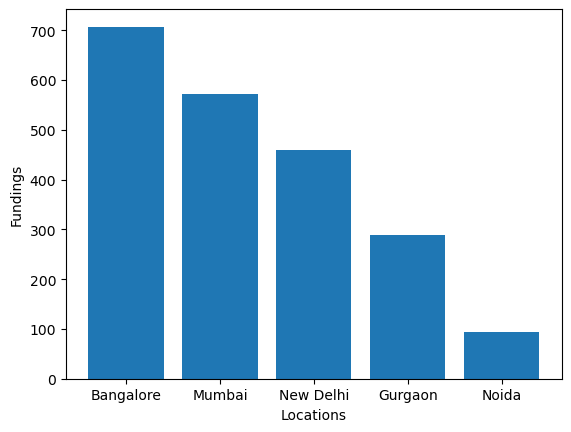

In [18]:
#Answer 1 top location 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "C:/Users/Abhilaksh/Desktop/startup_funding.csv"  
df = pd.read_csv(file_path, encoding='utf-8')
df['CityLocation'].dropna(inplace=True)

def separateCity(city):
    if pd.notna(city):
        return city.split('/')[0].strip()
    else:
        return 'Unknown'

df['CityLocation'] = df['CityLocation'].apply(separateCity)

# Correcting city names
df.loc[df['CityLocation'] == 'bangalore', 'CityLocation'] = 'Bangalore'
df.loc[df['CityLocation'] == 'Delhi', 'CityLocation'] = 'New Delhi'


# Filtering data for specific cities
city = df[(df['CityLocation'] == "Bangalore") | (df["CityLocation"] == "Mumbai") | (df["CityLocation"] == "New Delhi")|(df["CityLocation"] == "Noida") |(df["CityLocation"] == "Gurgaon")]
print(city)
# Getting value counts for each city
city_counts = city['CityLocation'].value_counts()
print(city_counts)


# Extracting location and funding data
locations = city_counts.index
fundings = city_counts.values
plt.bar(locations , fundings)
plt.xlabel("Locations")
plt.ylabel("Fundings")
plt.show()

In [4]:
import pandas as pd

file_path = "C:/Users/Abhilaksh/Desktop/startup_funding.csv"  
df = pd.read_csv(file_path, encoding='utf-8')

# Filtering out rows where the investors are undisclosed
df = df[df["Investors Name"] != 'Undisclosed Investors']
df = df[df["Investors Name"]!= 'Undisclosed investors']
df = df[df["Investors Name"] != 'undisclosed investors']
df = df[df["Investors Name"] != 'undisclosed investors']

# Getting value counts for the top 5 entries
top_5_counts = df["Investors Name"].value_counts()[0:5]

print(top_5_counts)


Ratan Tata                  25
Indian Angel Network        23
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    15
Name: Investors Name, dtype: int64


Bangalore 707
Mumbai 572
New Delhi 459
Gurgaon 288
Noida 93


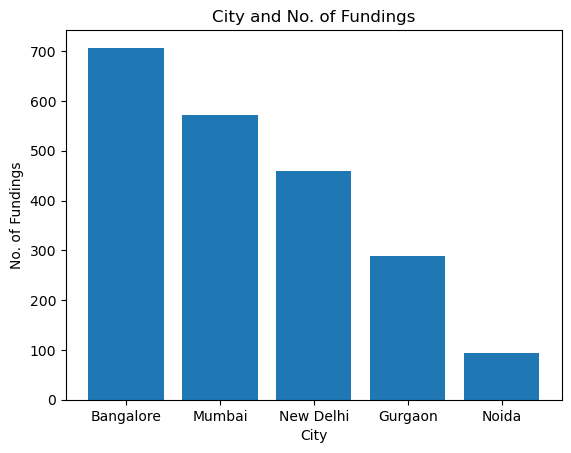

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "C:/Users/Abhilaksh/Desktop/startup_funding.csv"  
df = pd.read_csv(file_path, encoding='utf-8')
df['CityLocation'].dropna(inplace=True)

def separateCity(city):
    if pd.notna(city):
        return city.split('/')[0].strip()
    else:
        return 'Unknown'

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'] = df['CityLocation'].replace(['Delhi','bangalore'],['New Delhi','Bangalore'])
df=df[(df['CityLocation']=='Bangalore')|(df['CityLocation']=='Mumbai')|(df['CityLocation']=='Gurgaon')|(df['CityLocation']=='Noida')|(df['CityLocation']=='New Delhi')]
df=df.groupby(by='CityLocation').size()
df.sort_values(ascending=False,inplace=True)

city = df.index
no_of_fundings=df.values

for i in range(len(city)):
    print(city[i],no_of_fundings[i])
    
plt.bar(city,no_of_fundings)
plt.title('City and No. of Fundings')
plt.xlabel('City')
plt.ylabel('No. of Fundings')
plt.show()

[('Sequoia Capital', 72), ('Accel Partners', 68), ('', 58), ('Kalaari Capital', 50), ('SAIF Partners', 47)]
     Investor Name  Investment Count
0  Sequoia Capital                72
1   Accel Partners                68
2                                 58
3  Kalaari Capital                50
4    SAIF Partners                47


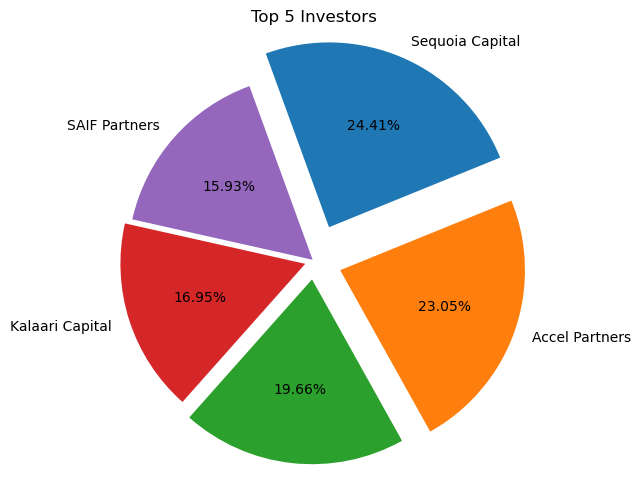

In [20]:
# Answer 2 top investor 
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Abhilaksh/Desktop/startup_funding.csv"  
df = pd.read_csv(file_path, encoding='utf-8')

# Filter out rows where the investors are undisclosed or null
df = df.dropna(subset=['Investors Name']) #drona from row 
df = df[df["Investors Name"].str.lower() != 'undisclosed investors']  

# Extract and count individual investor names
investors = df['Investors Name']
investors_name = []
for investor_list in investors:
    if investor_list:  ## Check if the entry is not empty
        # Split the comma-separated list of investors into individual names
        investor_list_split = [inv.strip() for inv in investor_list.split(',')]  #spit by ,
        investors_name.extend(investor_list_split)  #append like into list 


investor_counts = {}
for investor in investors_name:
    investor_counts[investor] = investor_counts.get(investor, 0) + 1

# Get the top 5 investors
top_investors = sorted(investor_counts.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_investors)  #sorted dictionary 

#panda dataframes
top_investor_names = [investor[0] for investor in top_investors]    #name  from dict
top_investor_counts = [investor[1] for investor in top_investors]    #count from dict
#for i in range (len(top_investor_names)):
    #print(top_investor_names[i] , top_investor_counts[i])
data = {
    'Investor Name': top_investor_names,
    'Investment Count': top_investor_counts
}
df_top_investors = pd.DataFrame(data)
print(df_top_investors)

# Plot the top 5 investors as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_investor_counts, labels=top_investor_names, autopct='%0.2f%%', counterclock=False, startangle=110, 
        explode=[0.2, 0.15, 0.1, 0.05, 0.01])
plt.title('Top 5 Investors')
plt.show()


KeyError: 'StartupName'

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Abhilaksh/Desktop/startup_funding.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Print out the column names to check for any leading/trailing spaces or typographical errors
print(df.columns)

# Example: Standardizing startup names
df['Startup Name'].replace(
    ['Oyorooms', 'OyoRooms', 'Oyo Rooms', 'OYO Rooms'], 'Oyo', inplace=True
)
# Continue with your data processing and analysis


Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'CityLocation', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')


Accel Partners 59
Sequoia Capital 53
Kalaari Capital 47
Blume Ventures 43
Indian Angel Network 41


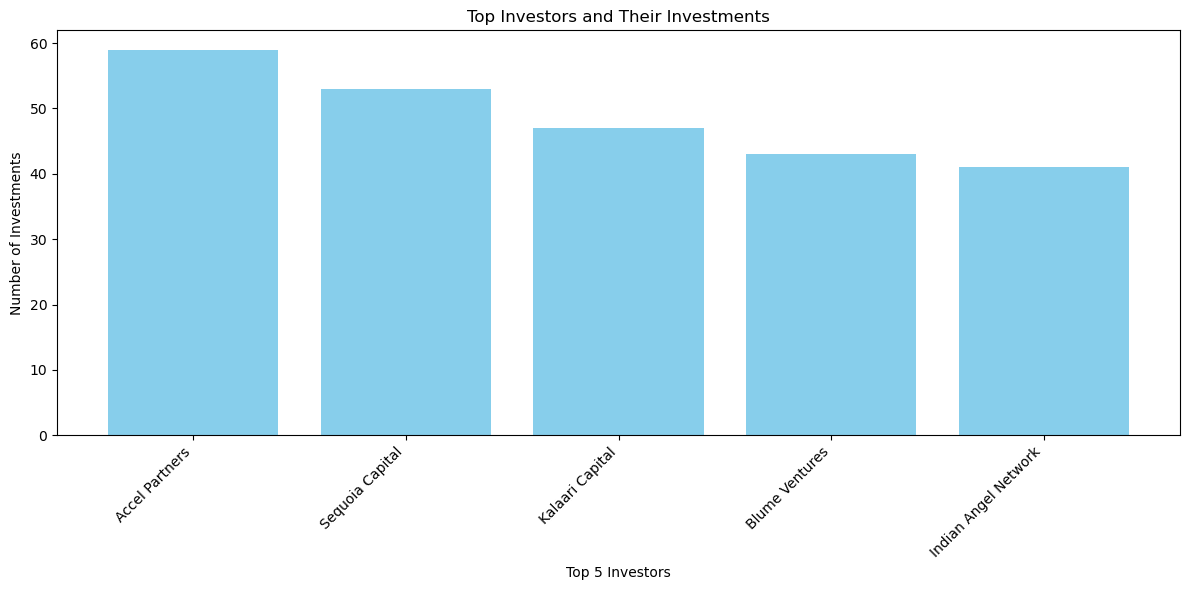

[('Accel Partners', 59), ('Sequoia Capital', 53), ('Kalaari Capital', 47), ('Blume Ventures', 43), ('Indian Angel Network', 41)]


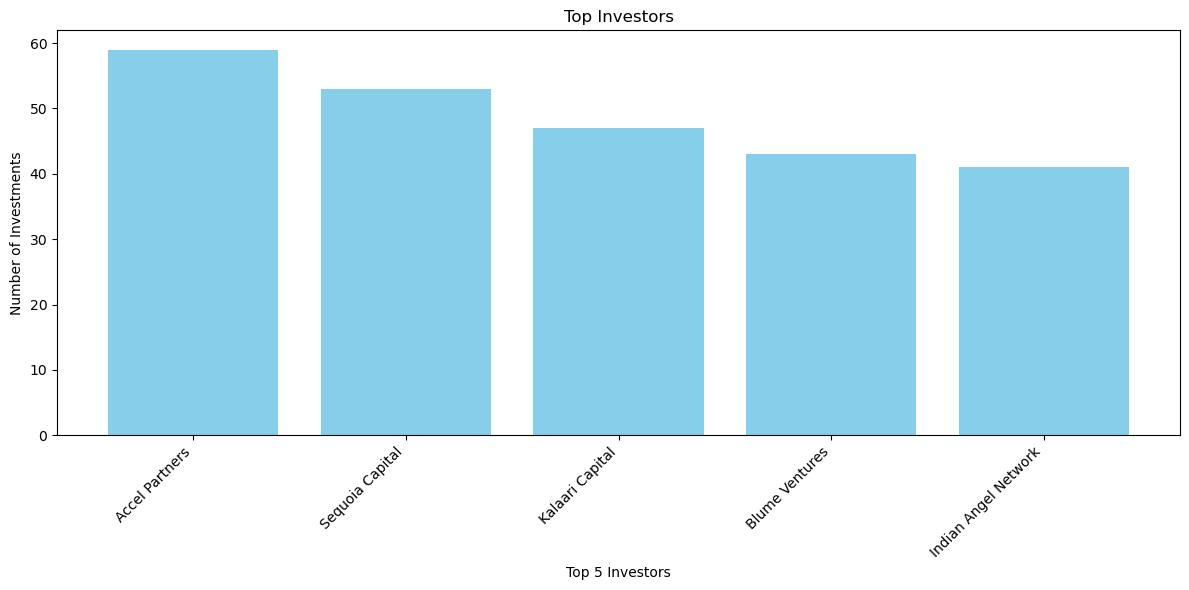

In [13]:
# Answer 3 unique Investor 
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Abhilaksh/Desktop/startup_funding.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Drop rows with missing values in 'Startup Name' or 'Investors Name'
df = df.dropna(subset=['Startup Name'])
df = df.dropna(subset=['Investors Name'])

# Standardize startup names
df['Startup Name'].replace(
    ['Oyorooms', 'OyoRooms', 'Oyo Rooms', 'OYO Rooms'], 'Oyo', inplace=True
)
df['Startup Name'].replace(
    ['Olacabs', 'Ola Cabs'], 'Ola', inplace=True
)
df['Startup Name'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['Startup Name'].replace('Paytm Marketplace', 'Paytm', inplace=True)

# Filter out rows with undisclosed investors

df = df[df["Investors Name"].str.lower() != 'undisclosed investors']  
# Extract and count unique investors for each startup
investors_name = []
startup_name = []

for index, row in df.iterrows():
    investors = [inv.strip() for inv in row['Investors Name'].split(',') if inv.strip() != '']
    for investor in investors:
        investors_name.append(investor)
        startup_name.append(row['Startup Name'])

# Create a dictionary to count unique startups for each investor
investor_startup_dict = {}
for investor, startup in zip(investors_name, startup_name):
    if investor not in investor_startup_dict:
        investor_startup_dict[investor] = set()
    investor_startup_dict[investor].add(startup)

# Convert the set counts to the number of unique startups
investor_counts= {}
for investor, startups in investor_startup_dict.items():
    investor_counts[investor] = len(startups)

# Get the top 5 investors
top_investors = sorted(investor_counts.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_investors)  # Sorted dictionary

# Extract names and counts for top investors
top_investor_names = [investor[0] for investor in top_investors]
top_investor_counts = [investor[1] for investor in top_investors]

# Plotting the data as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_investor_names, top_investor_counts, color='skyblue')
plt.xlabel('Top 5 Investors')
plt.ylabel('Number of Investments')
plt.title('Top Investors and Their Investments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Indian Angel Network 33
Rajan Anandan 24
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


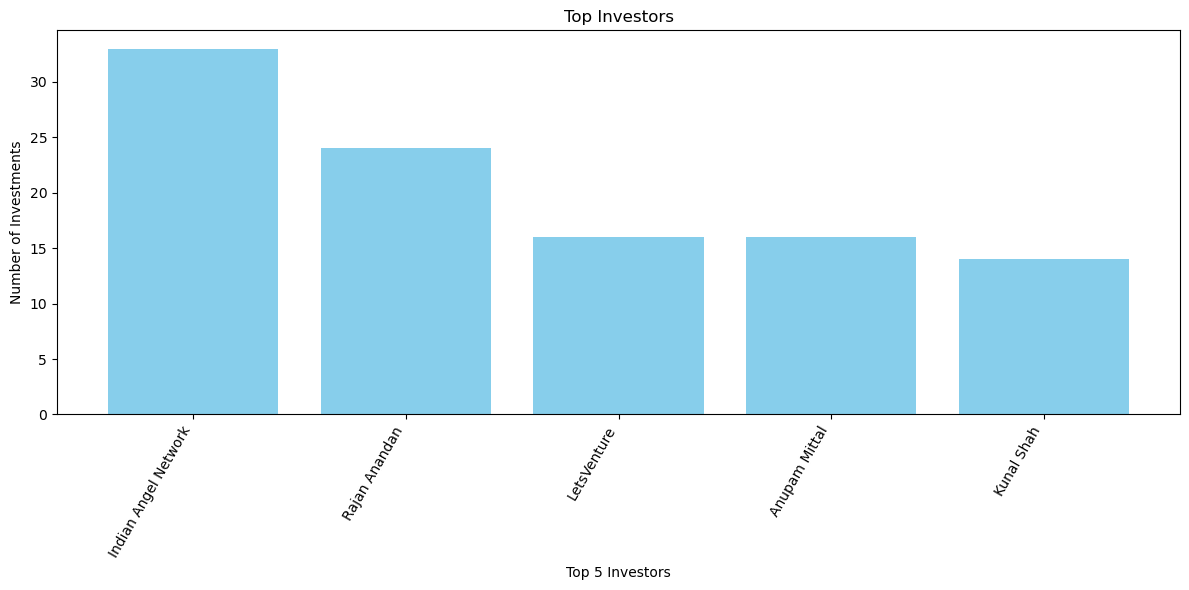

In [17]:
# Answer 4 invertor funding type crowd funding and seed funding
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Abhilaksh/Desktop/startup_funding.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Drop rows with missing values in 'Startup Name' or 'Investors Name'
df = df.dropna(subset=['Startup Name'])
df = df.dropna(subset=['Investors Name'])

# Standardize startup names
df['Startup Name'].replace(
    ['Oyorooms', 'OyoRooms', 'Oyo Rooms', 'OYO Rooms'], 'Oyo', inplace=True
)
df['Startup Name'].replace(
    ['Olacabs', 'Ola Cabs'], 'Ola', inplace=True
)
df['Startup Name'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['Startup Name'].replace('Paytm Marketplace', 'Paytm', inplace=True)

# Filter out rows with undisclosed investors

df = df[df["Investors Name"].str.lower() != 'undisclosed investors']  
# Filter for specific investment types
df['InvestmentnType'].replace(['PrivateEquity','SeedFunding','Crowd funding'],['Private Equity','Seed Funding','Crowd Funding'],inplace=True)
df = df[(df['InvestmentnType'] == 'Crowd Funding') | (df['InvestmentnType'] == 'Seed Funding')]

# Extract and count unique investors for each startup
investors_name = []
startup_name = []

for index, row in df.iterrows():
    investors = [inv.strip() for inv in row['Investors Name'].split(',') if inv.strip() != '']
    for investor in investors:
        investors_name.append(investor)
        startup_name.append(row['Startup Name'])

# Create a dictionary to count unique startups for each investor
investor_startup_dict = {}
for investor, startup in zip(investors_name, startup_name):
    if investor not in investor_startup_dict:
        investor_startup_dict[investor] = set()
    investor_startup_dict[investor].add(startup)

# Convert the set counts to the number of unique startups

investor_counts= {}
for investor, startups in investor_startup_dict.items():
    investor_counts[investor] = len(startups)


# Get the top 5 investors
top_investors = sorted(investor_counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract names and counts for top investors
top_investor_names = [investor[0] for investor in top_investors]
top_investor_counts = [investor[1] for investor in top_investors]

# Display top investors and their counts
for name, count in top_investors:
    print(name, count)

# Plotting the data as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_investor_names, top_investor_counts, color='skyblue')
plt.xlabel('Top 5 Investors')
plt.ylabel('Number of Investments')
plt.title('Top Investors')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


Accel Partners 53
Sequoia Capital 49
Kalaari Capital 39
Blume Ventures 31
SAIF Partners 26


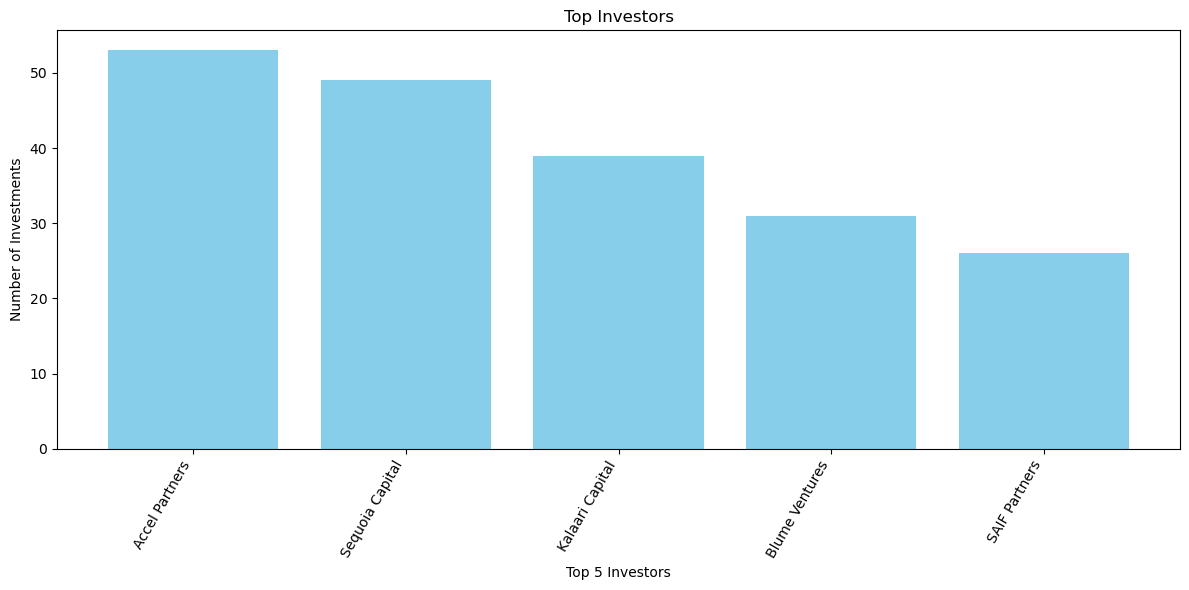

In [16]:
# Answer 5 invertor funding type "Private Equity"
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Abhilaksh/Desktop/startup_funding.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Drop rows with missing values in 'Startup Name' or 'Investors Name'
df = df.dropna(subset=['Startup Name'])
df = df.dropna(subset=['Investors Name'])

# Standardize startup names
df['Startup Name'].replace(
    ['Oyorooms', 'OyoRooms', 'Oyo Rooms', 'OYO Rooms'], 'Oyo', inplace=True
)
df['Startup Name'].replace(
    ['Olacabs', 'Ola Cabs'], 'Ola', inplace=True
)
df['Startup Name'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['Startup Name'].replace('Paytm Marketplace', 'Paytm', inplace=True)

# Filter out rows with undisclosed investors

df = df[df["Investors Name"].str.lower() != 'undisclosed investors']  
# Filter for specific investment types
df['InvestmentnType'].replace(['PrivateEquity','SeedFunding','Crowd funding'],['Private Equity','Seed Funding','Crowd Funding'],inplace=True)
df = df[(df['InvestmentnType'] == "Private Equity")]

# Extract and count unique investors for each startup
investors_name = []
startup_name = []

for index, row in df.iterrows():
    investors = [inv.strip() for inv in row['Investors Name'].split(',') if inv.strip() != '']
    for investor in investors:
        investors_name.append(investor)
        startup_name.append(row['Startup Name'])

# Create a dictionary to count unique startups for each investor
investor_startup_dict = {}
for investor, startup in zip(investors_name, startup_name):
    if investor not in investor_startup_dict:
        investor_startup_dict[investor] = set()
    investor_startup_dict[investor].add(startup)

# Convert the set counts to the number of unique startups

investor_counts= {}
for investor, startups in investor_startup_dict.items():
    investor_counts[investor] = len(startups)


# Get the top 5 investors
top_investors = sorted(investor_counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract names and counts for top investors
top_investor_names = [investor[0] for investor in top_investors]
top_investor_counts = [investor[1] for investor in top_investors]

# Display top investors and their counts
for name, count in top_investors:
    print(name, count)

# Plotting the data as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_investor_names, top_investor_counts, color='skyblue')
plt.xlabel('Top 5 Investors')
plt.ylabel('Number of Investments')
plt.title('Top Investors')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()
